In [1]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl

In [2]:
class lifting_table_specification:
    def __init__(self, gravity = 9.81):
        self.gravity = gravity

    def lead_screw(efficiency, pitch, load, speed):
        torque = load * pitch / (2 * np.pi * efficiency)
        power = torque * speed
        return torque, power

In [3]:
weight_dynamic = 250 
weight_table = 500
weight_static = 1000
safety_factor = 4

worse_case_load = 500
speed = 0.1 # m/s

In [4]:
conversion_factor = 2.20462
g = 9.81
power_motor = worse_case_load * speed * g / conversion_factor
power_motor

222.4873220781813

In [5]:
designed_power_motor = power_motor * safety_factor
designed_power_motor

889.9492883127252

In [6]:
pitch_12 = 1/ (12) # in/rev
pitch_100 = 1/ (100) # in/rev
efficiency = 0.7
worse_case_load = 500 # lbs
torque = worse_case_load * pitch_12 / (2 * np.pi * efficiency)
power = torque * speed

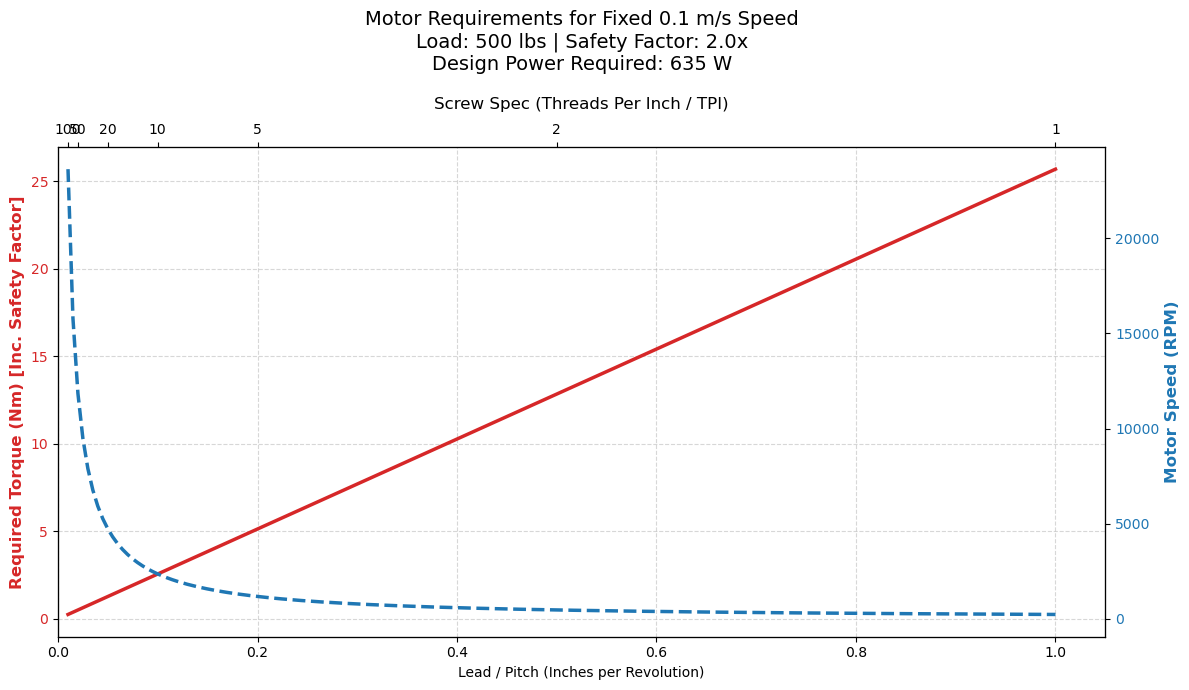

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class MotorLiftSim:
    def __init__(self, max_load_lbs=500, efficiency=0.7, safety_factor=1.5):
        self.max_load_lbs = max_load_lbs
        self.efficiency = efficiency
        self.safety_factor = safety_factor

    def set_safety_factor(self, sf):
        self.safety_factor = sf

    def plot_constant_speed_requirements(self, target_speed_mps=0.1):
        """
        Plots Torque and RPM requirements to maintain a CONSTANT linear lift speed
        across different leadscrew pitches (from 100 TPI to 1 TPI).
        """
        # 1. Setup Data
        # Range of Pitches: 
        # Start: 0.01 inch (100 TPI) 
        # End:   1.00 inch (1 TPI)
        pitch_inch = np.linspace(0.01, 1.0, 200) 
        pitch_m = pitch_inch * 0.0254
        
        # 2. Physics Constants (Applying Safety Factor)
        # We design for the Peak Load * Safety Factor
        design_load_lbs = self.max_load_lbs * self.safety_factor
        force_n = design_load_lbs * 4.44822 
        
        # 3. Calculate Metrics
        # Torque (Nm) = F * p / (2 * pi * eff)
        torque_nm = (force_n * pitch_m) / (2 * np.pi * self.efficiency)
        
        # RPM = (Linear Speed / Pitch) * 60
        rpm = (target_speed_mps / pitch_m) * 60
        
        # Power (Watts) = Force * Velocity / Efficiency
        # Power is constant because Speed and Load are constant
        power_watts = (force_n * target_speed_mps) / self.efficiency
        
        # 4. Generate Plot
        fig, ax1 = plt.subplots(figsize=(12, 7)) # Made figure slightly wider
        
        # --- Primary X-Axis (Pitch in Inches) ---
        ax1.set_xlabel('Lead / Pitch (Inches per Revolution)')
        ax1.set_xlim(0.0, 1.05) # Add a little padding
        
        # --- Left Y-Axis (Torque) ---
        color = 'tab:red'
        ax1.set_ylabel('Required Torque (Nm) [Inc. Safety Factor]', color=color, fontsize=12, fontweight='bold')
        ax1.plot(pitch_inch, torque_nm, color=color, linewidth=2.5, label='Torque')
        ax1.tick_params(axis='y', labelcolor=color)
        ax1.grid(True, which='both', linestyle='--', alpha=0.5)

        # --- Right Y-Axis (RPM) ---
        ax2 = ax1.twinx()
        color = 'tab:blue'
        ax2.set_ylabel('Motor Speed (RPM)', color=color, fontsize=12, fontweight='bold')
        ax2.plot(pitch_inch, rpm, color=color, linewidth=2.5, linestyle='--', label='RPM')
        ax2.tick_params(axis='y', labelcolor=color)

        # --- Secondary Top X-Axis (TPI) ---
        ax_top = ax1.twiny()
        ax_top.set_xlim(ax1.get_xlim()) 
        
        # Expanded TPI ticks to cover the 100 to 1 range
        target_tpi = np.array([100, 50, 20, 10, 5, 2, 1])
        tpi_locations = 1.0 / target_tpi 
        
        ax_top.set_xticks(tpi_locations)
        ax_top.set_xticklabels([f"{t}" for t in target_tpi])
        ax_top.set_xlabel("Screw Spec (Threads Per Inch / TPI)", fontsize=12, labelpad=10)

        # Title & Annotation
        title_text = (f"Motor Requirements for Fixed {target_speed_mps} m/s Speed\n"
                      f"Load: {self.max_load_lbs} lbs | Safety Factor: {self.safety_factor}x\n"
                      f"Design Power Required: {int(power_watts)} W")
        
        plt.title(title_text, pad=20, fontsize=14)
        
        plt.tight_layout()
        plt.show()

# --- Run Simulation ---
# Max Load: 500 lbs, Efficiency: 70%, Safety Factor: 2.0x
sim = MotorLiftSim(max_load_lbs=500, efficiency=0.7, safety_factor=2.0)
sim.plot_constant_speed_requirements(target_speed_mps=0.1)

In [8]:
import numpy as np

def calculate_12tpi_specs():
    # Inputs
    load_lbs = 250
    safety_factor = 4.0
    efficiency = 0.4
    motor_efficiency = 0.9
    effective_efficiency = efficiency * motor_efficiency
    speed_mps = 0.1
    pitch_tpi = 12  # 12 rev/inch
    
    # 1. Apply Safety Factor
    design_load = load_lbs * safety_factor  # 1000 lbs
    force_n = design_load * 4.44822         # Convert to Newtons (~4448 N)
    
    # 2. Convert Pitch
    pitch_inch = 1.0 / pitch_tpi            # 0.0833 inches
    pitch_m = pitch_inch * 0.0254           # 0.0021 meters
    
    # 3. Calculate Torque (T = F*p / 2*pi*eff)
    torque_nm = (force_n * pitch_m) / (2 * np.pi * effective_efficiency)
    
    # 4. Calculate RPM (RPM = Speed/Pitch * 60)
    rpm = (speed_mps / pitch_m) * 60
    
    return torque_nm, rpm

t, r = calculate_12tpi_specs()
print(f"Torque: {t:.2f} Nm")
print(f"RPM:    {r:.0f} RPM")

Torque: 4.16 Nm
RPM:    2835 RPM


In [9]:
1/12 # inch per revolution
speed = r * (1/12) * 0.0254 / 60  # m/s
speed

0.1